In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone --filter=blob:none --sparse https://github.com/editor-kagaku/Binary.git
%cd Binary
!git sparse-checkout set chapter7
%cd chapter7

In [ ]:
!git clone https://github.com/radareorg/radare2
!radare2/sys/install.sh
!pip install r2pipe

Cloning into 'radare2'...
remote: Enumerating objects: 294256, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 294256 (delta 44), reused 54 (delta 23), pack-reused 294132
Receiving objects: 100% (294256/294256), 169.76 MiB | 21.83 MiB/s, done.
Resolving deltas: 100% (231486/231486), done.
/content/Binary/chapter7/radare2
[WW] Do not run this script as root!
From https://github.com/radareorg/radare2
 * branch                  master     -> FETCH_HEAD
Already up to date.
[*] Finding gmake is a tracked alias for /usr/bin/gmake OK
[*] Configuring the build system ... OK
[*] Checking out capstone... OK
[*] Checking out vector35-arm64... OK
[*] Checking out vector35-armv7... OK
[*] Running configure... OK
[*] Ready. You can now run 'make'.
ARGS=
/bin/bash ./sys/build.sh
/content/Binary/chapter7/radare2
Building on Linux : computing number of allowed parallel jobs.
Maximum allowed RAM memory per job is 150000 kB.
Number of

In [ ]:
!chmod u+x prob7-2
!./prob7-2

Input password.


In [ ]:
!./prob7-2 aaaa

Authentication failed.


In [ ]:
import r2pipe

r2 = r2pipe.open("prob7-2")
r2.cmd('aaa')
functions = r2.cmdj('aflj')
print([x['name'] for x in functions])
r2.quit()

['sym.imp.strncpy', 'sym.imp.puts', 'sym.imp.strlen', 'sym.imp.memset', 'sym.imp.memcmp', 'entry0', 'sym.rand', 'sym.srand', 'sym.deregister_tm_clones', 'sym.register_tm_clones', 'sym.__do_global_dtors_aux', 'sym.frame_dummy', 'sym._fini', 'sym._dl_relocate_static_pie', 'main', 'sym._init']


In [ ]:
import r2pipe

r2 = r2pipe.open("prob7-2")
r2.cmd('aaa')
functions = r2.cmdj('aflj')
functions = [f for f in functions if f['name'] in ['main', 'sym.srand', 'sym.rand']]

for function in functions:
    function_address = function['offset']
    function_size = function['size']
    function_name = function['name']
    r2.cmd('e asm.bytes=false')
    r2.cmd('e asm.cmt.right=false')
    disassembly = r2.cmd(f'pD {function_size} @{function_address}')
    print(disassembly)

    r2.cmd(f'agfw {function_name} {function_size} @{function_address}')

r2.quit()

            ; CALL XREF from main @ 0x4012f0(x)
┌ 66: int sym.rand ();
│           ; var signed int64_t var_4h @ rbp-0x4
│           ; var int64_t var_8h @ rbp-0x8
│           ; var int64_t var_ch @ rbp-0xc
│           0x004011cd      endbr64
│           0x004011d1      push rbp
│           0x004011d2      mov rbp, rsp
│           0x004011d5      mov dword [var_4h], 0x41c64e6d
│           ; '90'
│           0x004011dc      mov dword [var_8h], 0x3039
│           0x004011e3      mov dword [var_ch], 0x7fffffff
│           ; [0x40403c:4]=0
│           0x004011ea      mov eax, dword [obj.x]
│           0x004011f0      imul eax, dword [var_4h]
│           0x004011f4      mov edx, eax
│           0x004011f6      mov eax, dword [var_8h]
│           0x004011f9      add eax, edx
│           0x004011fb      and eax, dword [var_ch]
│           ; [0x40403c:4]=0
│           0x004011fe      mov dword [obj.x], eax
│           ; [0x40403c:4]=0
│           0x00401204      mov eax, dword [obj.x]
│       

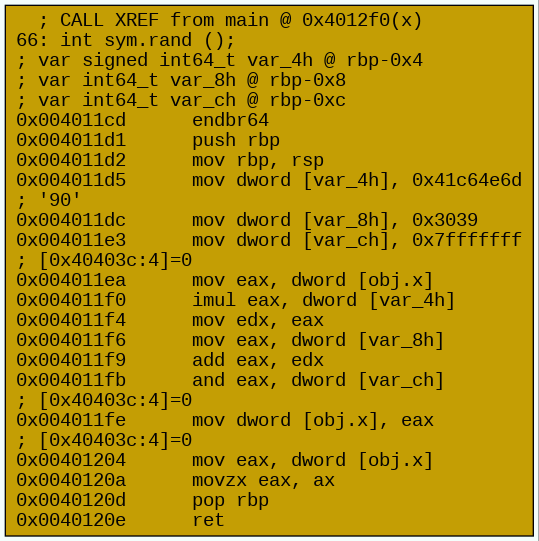

In [ ]:
import IPython

IPython.display.Image('main', format='png')

In [ ]:
import os, sys, struct, string, itertools

def rand(s):
    a = 1103515245
    b = 12345
    c = 2147483647
    x = s

    while True:
        x = (a * x + b) & c
        yield x & 0xFFFF

def enc(msg):
    key = rand(struct.unpack("<H", msg[0:2])[0])
    encoded_msg = []

    for i in range(2, len(msg), 2):
        e = struct.unpack("<H", msg[i:i+2])[0]
        r = next(key)
        encoded_msg.append(struct.pack("<H", e ^ r))

    encoded_bytes = b"".join(encoded_msg)
    return encoded_bytes

def solve(encoded_msg):
    for initial_msg in itertools.product(range(0x20, 0x7F), repeat=2):
        key = rand(struct.unpack("<H", struct.pack("<2B", *initial_msg))[0])
        msg = [struct.pack("<2B", *initial_msg)]

        for i in range(0, len(encoded_msg), 2):
            e = struct.unpack("<H", encoded_msg[i:i+2])[0]
            r = next(key)
            msg.append(struct.pack("<H", e ^ r))

        decoded_msg = b"".join(msg)
        if all(chr(c) in string.printable for c in decoded_msg):
            return decoded_msg

    return False

print(solve(b"\x55\x35\x52\x8a\xb0\x6c\xf9\xb5\x0c\x8d\x39\xe9"))

b'Reversing1sFun'


In [ ]:
!./prob7-2 Reversing1sFun

Success!
